# Laboratorio 05 - Autocodificadores

Integrantes:
- José Pablo Kiesling Lange, 21581
- Melissa Pérez Alarcón, 21385

### Configuración de GPU

In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

### Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

### Preparación de Datos

In [3]:
# carga de datos
df = pd.read_csv('./data/UK_foods.csv')

print(df.head())

       Unnamed: 0  England  Wales  Scotland  N.Ireland
0          Cheese      105    103       103         66
1   Carcass_meat       245    227       242        267
2     Other_meat       685    803       750        586
3            Fish      147    160       122         93
4  Fats_and_oils       193    235       184        209


In [4]:
# información general del dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  17 non-null     object
 1   England     17 non-null     int64 
 2   Wales       17 non-null     int64 
 3   Scotland    17 non-null     int64 
 4   N.Ireland   17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 812.0+ bytes
None


In [5]:
# descripción de los datos
print(df.describe())

           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000


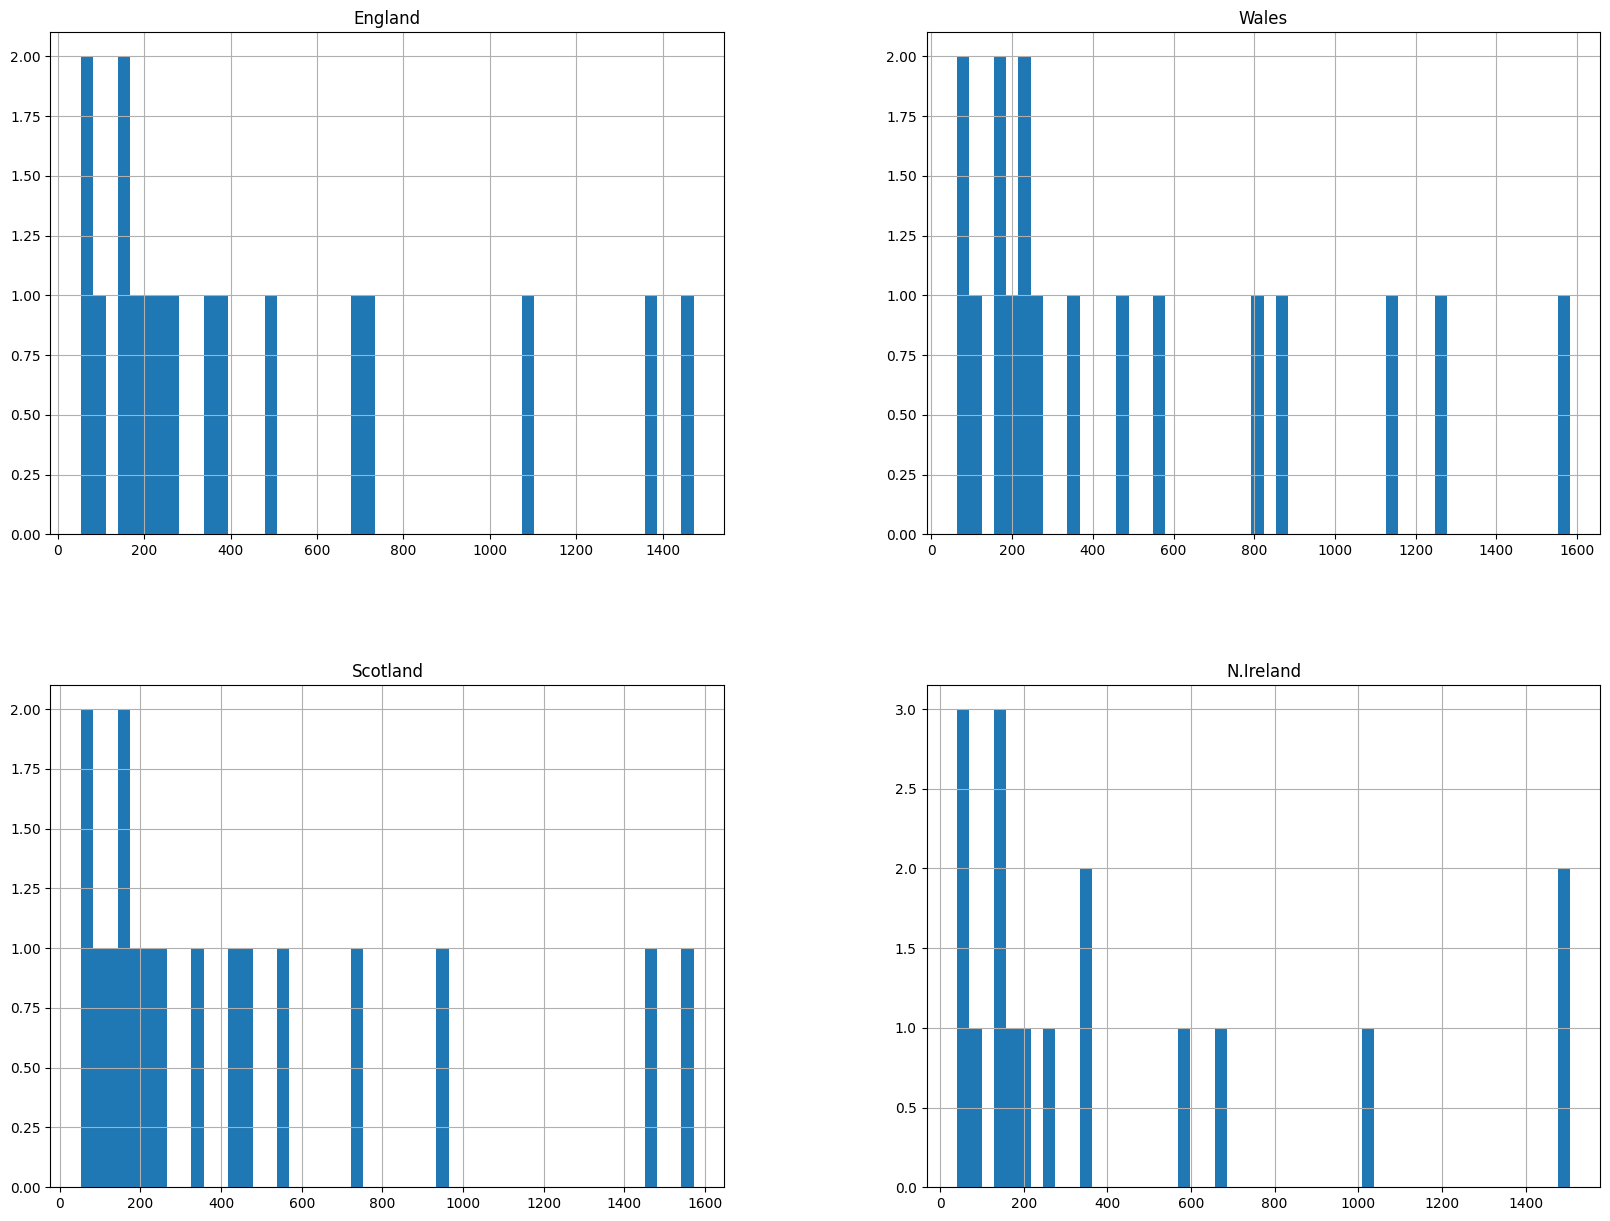

In [6]:
# histogramas de distribución de los datos
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# normalización de los datos
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

In [8]:
print(df_scaled.head())

    England     Wales  Scotland  N.Ireland
0  0.035966  0.025692  0.032916   0.017065
1  0.134697  0.107378  0.124424   0.154266
2  0.444993  0.486825  0.458855   0.372014
3  0.065585  0.063241  0.045425   0.035495
4  0.098025  0.112648  0.086241   0.114676


#### Hallazgos en la preparación de datos
- El DataFrame tiene 17 filas y 5 columnas donde la primera es de texto y el resto numéricas.
- Las estadísticas descriptivas muestran lo siguiente:
    - El consumo medio y la desviación estándar varían, específicamente con Inglaterra y Gales porque muestran mayores consumos promedio.
    - La desviación estándar es bastante alta en todas las regiones por lo que existe una variablidad en el consumo de alimentos.
    - Los valores mínimos y máximos varían significativamente lo que demuestra diferencias significativas en cuanto a popularidad o disponibilidad de alimentos.

### Construcción del Autocodificador

In [9]:
# dimensión de los datos de entrada
input_dim = df_scaled.shape[1]

# capa de entrada
input_layer = Input(shape=(input_dim,))

# encoder
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)
# capa de cuello de botella
bottleneck = Dense(2, activation='relu')(encoded)

# decoder
decoded = Dense(4, activation='relu')(bottleneck)
decoded = Dense(8, activation='relu')(decoded)

# capa de salida
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

# modelo
autoencoder = Model(input_layer, output_layer)

In [10]:
# compilación del modelo
autoencoder.compile(optimizer='Adamax', loss='mse')

In [11]:
# resumen del modelo
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174 (696.00 B)

 Trainable params: 174 (696.00 B)

 Non-trainable params: 0 (0.00 B)

#### Estructura del modelo
- Capa de entrada con tamaño de salida de 4.
- Capas densas:
    - dense: primera capa densa con 8 neuronas usando la función de activación relu. Tiene 40 parámetros.
    - dense_1: reduce el número de neuronas a 4 con relu. Tiene 36 parámetros.
    - dense_2: es la capa de cuello de botella con 2 neuronas, los datos se comprimen a la representación más pequeña. Tiene 10 parámetros.
    - dense_3, dense_4 y dense_5: forman el decoder reduciendo las neuronas a 4.

#### Parámetros del modelo
Tiene un total de 174 parámetros entrenables para que puedan ajustarse durante el proceso de entrenamiento.

#### Funciones de activación
- ReLu: se utilizó en todas las capas, menos en la capa de salida para que aprendiera patrones complejos.
- Sigmoide: para la capa de salida y mantener los valores entre 0 y 1.

In [12]:
# entrenamiento del modelo
history = autoencoder.fit(df_scaled, df_scaled, epochs=30, batch_size=10, verbose=1)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1461  
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1483 
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1379 
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1431 
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1367 
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1442 
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1346 
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1351 
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1403 
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1392 
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1399 
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1374 
Epoch 13/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1350 
Epoch 14/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1413 
Epoch 15/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1414 
Epoch 16/30
2/2 ━━━━━━━━━━━━━━━━━

In [13]:
# evaluación del modelo
loss = autoencoder.evaluate(df_scaled, df_scaled)
print("Pérdida:", loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1273
Pérdida: 0.12734712660312653


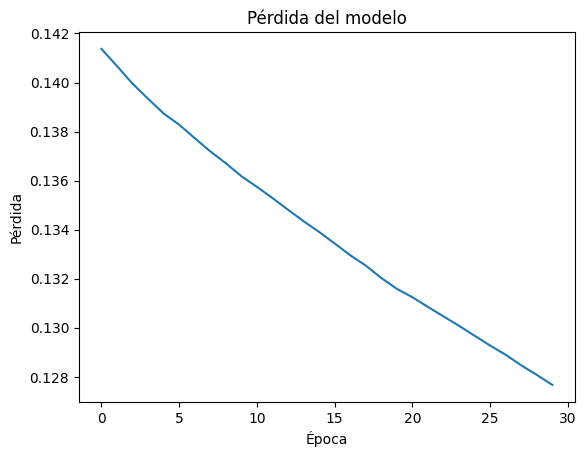

In [14]:
# visualización de la pérdida
plt.plot(history.history['loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()

#### Interpretación
Durante el entrenamiento, se tuvo una pérdida entre [0.13-0.15] en las primeras épocas, luego disminuye gradualmente cerca de 0.12. Esta pérdida indica que el modelo está aprendiendo efectivamente cómo comprimir y luego reconstruir los datos en cada época de entrenamiento. 

En la gráfica puede notarse esa evolución de la pérdida que disminuye a lo largo de las épocas. Además en las últimas épocas, la pérdida parece acercarse a un valor más estable.

### Reducción de Dimensionalidad y Visualización

### Discusión y percepciones nuevas "Insights"